# Data Sceince With Python

## Part 1: Visualize Daily Treasury Yield Curve Rates

### 1. You are provided with a Daily Treasury Yield Curve Rates as rates.csv file. Load into dataframe. Use Date as index.

In [57]:
# your code here:
import pandas as pd

rates = pd.read_csv('rates.csv')
rates.set_index('Date', inplace = True)

In [58]:
rates

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
1/2/19,2.40,2.40,2.42,2.51,2.60,2.50,2.47,2.49,2.56,2.66,2.83,2.97
1/3/19,2.42,2.42,2.41,2.47,2.50,2.39,2.35,2.37,2.44,2.56,2.75,2.92
1/4/19,2.40,2.42,2.42,2.51,2.57,2.50,2.47,2.49,2.56,2.67,2.83,2.98
1/7/19,2.42,2.42,2.45,2.54,2.58,2.53,2.51,2.53,2.60,2.70,2.86,2.99
1/8/19,2.40,2.42,2.46,2.54,2.60,2.58,2.57,2.58,2.63,2.73,2.88,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
12/24/19,1.55,1.58,1.58,1.61,1.53,1.62,1.64,1.72,1.83,1.90,2.20,2.33
12/26/19,1.59,1.60,1.58,1.61,1.53,1.64,1.65,1.72,1.85,1.90,2.19,2.33
12/27/19,1.56,1.56,1.57,1.59,1.51,1.59,1.60,1.68,1.80,1.88,2.18,2.32


### 2. Plot curves on all columns in one graph, with x axis the count of date, y axis the rates. By visually inspecting the curves, which curve has the overall highest rate through out the year? Highlight that curve with red solid line, every other curves in dash line.

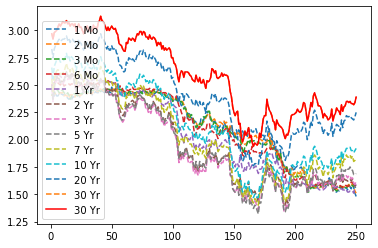

In [59]:
# your code here:
import matplotlib.pyplot as plt
%matplotlib inline

for i in rates.columns:
    plt.plot(range(1,len(rates.index)+1),rates[i],'--',label=i)
plt.plot(range(1,len(rates.index)+1),rates['30 Yr'],'r-',label='30 Yr')
plt.legend()

### 3. PairGrid all short rates (less than one year rate). You should get a 4x4 graph. Use histplot for diagonal plots, use scatter plot for upper corner, and regplot for lower corner.

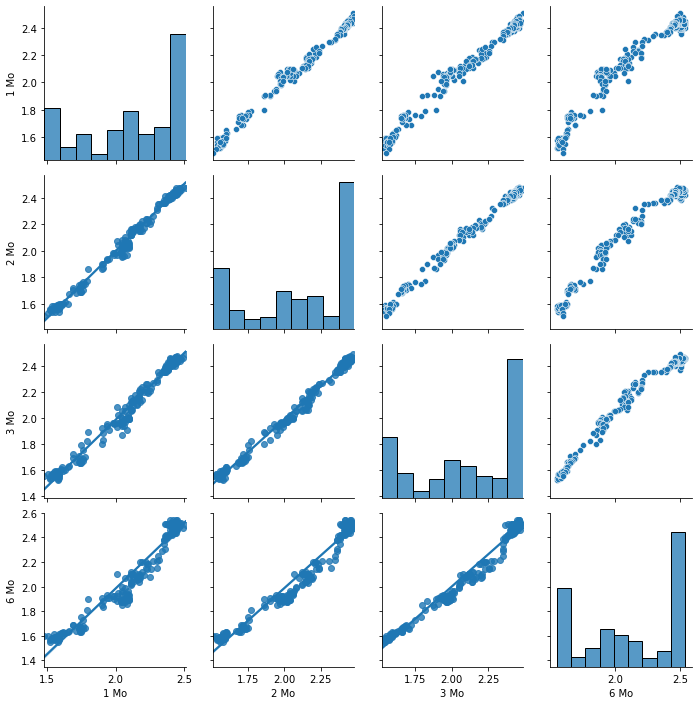

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = rates.iloc[:,0:4] 
graph = sns.PairGrid(cols)
# type of graph for non-diagonal(upper part)
graph = graph.map_upper(sns.scatterplot)
# type of graph for non-diagonal(lower part)
graph = graph.map_lower(sns.regplot)
# type of graph for diagonal
graph = graph.map_diag(sns.histplot)
# to show
plt.show()

### 4. "reg" jointplot 2m and 3m rates.

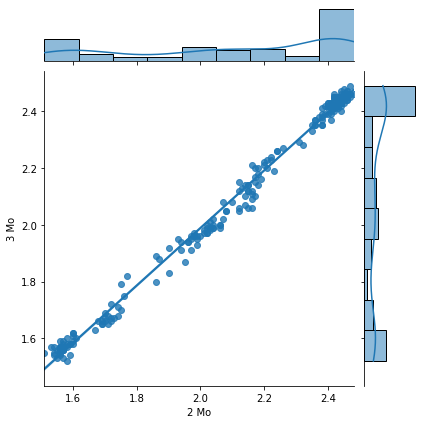

In [61]:
# your code here
sns.jointplot(x = '2 Mo', y='3 Mo', data= rates, kind = 'reg') # reg: linear regression

### (10pts)5. Use heatmap to show the correlations between each column.

<AxesSubplot:>

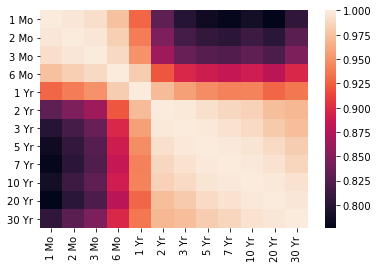

In [62]:
# your code here:
sns.heatmap(rates.corr())

## part 2: Titanic

You can load the titanic data in seaborn 
`titanic = sns.load_dataset('titanic')`

### select only the four columns: ['survived','sex', 'age', 'class']

In [63]:
# your code here:
titanic = sns.load_dataset('titanic')
titanic = titanic.loc[:,['survived','sex', 'age', 'class']]

In [64]:
titanic

,survived,sex,age,class
0,0,male,22.0,Third
1,1,female,38.0,First
2,1,female,26.0,Third
3,1,female,35.0,First
4,0,male,35.0,Third
...,...,...,...,...
886,0,male,27.0,Second
887,1,female,19.0,First
888,0,female,NaN,Third
889,1,male,26.0,First


### Use countplot to show the survived count of male and female:

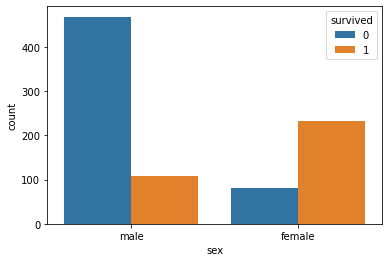

In [65]:
# your code here:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x ='sex', hue = "survived" ,data = titanic)
plt.show()

### Display the age distribution between survived and not survived in violinplot

<AxesSubplot:xlabel='sex', ylabel='age'>

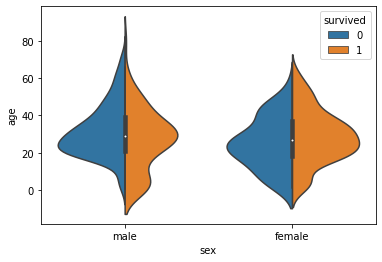

In [66]:
# your code here:
import seaborn as sns
sns.violinplot(x='sex', y='age', hue = 'survived', data=titanic, split = True)

###  compare the age distribution for each class and split by survival status.

<AxesSubplot:xlabel='class', ylabel='age'>

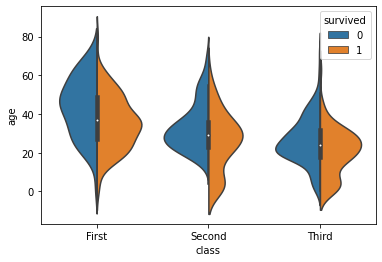

In [67]:
# your code here:
import seaborn as sns
sns.violinplot(x='class', y='age', hue = 'survived', data=titanic, split = True)

### inspect the age distribution between male and female using boxplot.

<AxesSubplot:xlabel='sex', ylabel='age'>

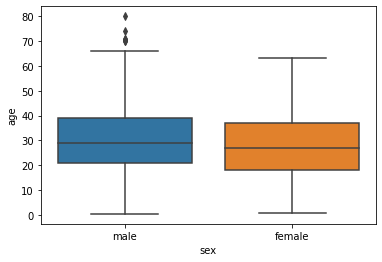

In [69]:
# your code here:
sns.boxplot(x ='sex', y= 'age', data=titanic)